## 4.0 Evaluating a Machine Learning Model
Finding out how well a model performs and whether the data it predicts is reliable for production. 

3 ways to evaluate scikit models/estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem specific metric functions.

In [115]:
what_we_are_covering = [
    'End to end scikit-learn workflow',
    'Getting the data ready',
    'Choose the right estimator/algorithm',
    'Fit the model/algorithm/estimator & use it to make predictions',
    'Evaluating a model',
    'Improve a model',
    'Save & Load Model',
    'Putting it all together'
]
what_we_are_covering

['End to end scikit-learn workflow',
 'Getting the data ready',
 'Choose the right estimator/algorithm',
 'Fit the model/algorithm/estimator & use it to make predictions',
 'Evaluating a model',
 'Improve a model',
 'Save & Load Model',
 'Putting it all together']

In [79]:
# import standard libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
# create a pandas DataFrame from (heart disease) data
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 4.1 Evaluation:`score` method
Evaluating a classifier/estimator based on the score method comes attached to the estimator object. 

In [81]:
# setup a random seed and split data
np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease.target

# splitting data into training & test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# import a model for classification
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train);
clf.score(X_test, y_test)

0.8524590163934426

### 4.2 Evaluation: `scoring` Parameter
Evaluating a model based on a scoring parameter

In [82]:
np.random.seed(42)
from sklearn.model_selection import cross_val_score

clf_score = clf.score(X_test, y_test)
cross_clf_split = cross_val_score(clf, X, y, cv=5)

In [83]:
print(f"\n mean of the cross_val_score: {np.mean(cross_clf_split * 100):.2f}%")
print(f" classifier score method: {clf_score * 100:.2f}%")


 mean of the cross_val_score: 82.48%
 classifier score method: 85.25%


#### 4.2.1 Testing out different scoring parameters

In [90]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(
    data=boston["data"],
    columns=boston["feature_names"]
)

boston_df["TARGET"] = boston["target"]

In [93]:
boston_df.shape

(506, 14)

In [97]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = boston_df.drop("TARGET", axis=1)
y = boston_df.TARGET

regressor = RandomForestRegressor()
cvs_reg_default_score = cross_val_score(regressor, X, y, cv=5)

In [102]:
print(f"Cross Value Score (Coefficient of Determination): {np.mean(cvs_reg_default_score) * 100:.2f}%")

Cross Value Score (Coefficient of Determination): 62.44%


In [111]:
from sklearn.metrics import SCORERS
list(SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jaccard_macro',
 'jaccard_m

In [114]:
np.random.seed(42)
cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")

array([ -7.86326927, -12.71243178, -20.29089194, -45.93287403,
       -19.50774726])

### 4.3 Classification: Model Evaluation Metrics


1. Area of Accuracy
2. Area under ROC
3. Confusion Matrix
4. Classification Report

#### 4.3.1 Area of Accuracy

In [7]:
np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [8]:
print(f"\nHeart Disease Classifer Cross-Validated Accuracy: {np.mean(cross_val_score * 100):.2f}%\n")


Heart Disease Classifer Cross-Validated Accuracy: 82.48%



#### 4.3.2 AUC/ROC aka AUROC
- `AUC`: Area Under Curve
- `ROC`: Receiver Operating Characteristic

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.
The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.

In [9]:
np.random.seed(42)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

# separating predictions where heart disease target value was "1" or positive/True
y_pred_positives = clf.predict_proba(X_test)[:, 1]

# finding the ROC curve based on the y_true/y_test data vs the True predictions made by the model
fpr, tpr, thresholds = roc_curve(y_test, y_pred_positives)

In [10]:
def plot_roc(fpr, tpr):
    """
    Plots the ROC curve based on the following:
        
        parameters:
        ------------------------
        FPR (False Positibve Rate)
        TPR (True Positive Rate)
        \n
    """
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0, 1], color="darkblue", linestyle="--", label="Guess")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("Receiver Operating Characteristic (ROC)")
    plt.legend()

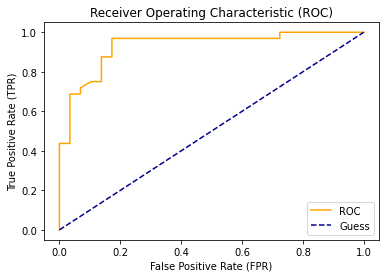

In [11]:
plot_roc(fpr, tpr)

In [12]:
round(roc_auc_score(y_test, y_pred_positives) * 100, 2)

93.05

#### 4.3.3 Confusion Matrix
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence giving the idea of where the model is getting confused

In [13]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)


In [16]:
import seaborn as sns
# sns.set(font_scale=1.2)

conf_mat = confusion_matrix(y_test, y_preds)

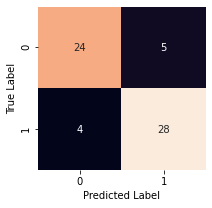

In [17]:

def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using seaborn heatmap function
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(
            conf_mat, 
            annot=True,
            cbar=False
            )
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show();


plot_conf_mat(conf_mat)

In [18]:
pd.crosstab(
    y_test, 
    y_preds,
    rownames=["Actual Labels"],
    colnames=["Predicted Labels"]
)

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


In [19]:
sns.set(font_scale=1.5)
from sklearn.metrics import plot_confusion_matrix

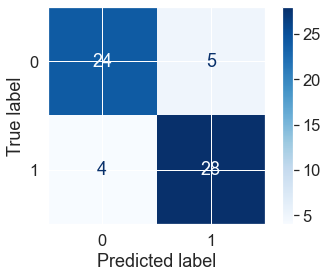

In [20]:
plot_confusion_matrix(clf, X_test, y_test, colorbar=True, cmap="Blues");

#### 4.3.4 Classification Report

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [22]:
# trying the classification report with dataset that has classification imbalance
# e.g. majority of the data contains one class over the other: 85% false and 15% true
# above example points how how the dataset is imbalanced between two classes

disease_true = np.zeros(10000)
disease_true[0] = 1

disease_preds = np.zeros(10000)

pd.DataFrame(
    classification_report(
        disease_true,
        disease_preds,
        zero_division=0,
        output_dict=True)
)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.4 Regression: Model Evaluation Metrics

[Model Evaluation Metrics Documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#)

1. R^2 (pronounced R-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [42]:
# importing dataset from sklearn library that has a regression problem
from sklearn.datasets import load_boston
boston = load_boston()

boston_df = pd.DataFrame(
    data=boston["data"],
    columns=boston["feature_names"]
);

boston_df["TARGET"] = boston["target"]
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### 4.4.1 `R^2`: Coefficient of Determination
What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of targets, it's `R^2` value would be 0 AND if your model perfectly predicts a range of number it's `R^2` value woudl be 1

In [43]:
from sklearn.ensemble import RandomForestRegressor
# splitting data into X (n_samples, n_features) and y aka labels (n_samples)
np.random.seed(42)
X = boston_df.drop("TARGET", axis=1)
y = boston_df.TARGET
# splitting X & y into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train);

In [44]:
round(model.score(X_test, y_test) * 100, 2)

86.54

In [45]:
# showing an example of how it gets 0 (poor model) and 1 where model is able to predict what y_true shows
from sklearn.metrics import r2_score

np_test_mean = np.full(len(y_test), y_test.mean())

r2_score(y_test, np_test_mean)

0.0

example above shows a score of 0.0: Which points to it being a poor score

In [46]:
r2_score(y_test, y_test)

1.0

In [47]:
y_preds = model.predict(X_test)
r2_score(y_test, y_preds)

0.8654448653350507

#### 4.4.2 Mean Absolute Error (MAE)
MAE: is the average of the absolute differences between the predictions and the actual values. It gives you the idea of how wrong your model predictions are

In [48]:
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)

mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [58]:
df = pd.DataFrame(data={
    "Y_TRUE": y_test,
    "Y_PRED": y_preds
})

df["DIFF"] = df["Y_PRED"] - df["Y_TRUE"]

In [64]:
df

,Y_TRUE,Y_PRED,DIFF
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


#### 4.4.3 Mean Squared Error (MSE)
Evaluates the mean after squaring the difference between true values and predictions made by the model

In [66]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [69]:
np.square(df['DIFF'])

173     0.269361
274     3.334276
491     9.979281
72      0.435600
452     0.628849
         ...    
412    22.477081
436     8.271376
411    12.873744
86      5.267025
75      5.914624
Name: DIFF, Length: 102, dtype: float64

In [70]:
df['DIFF']

173   -0.519
274   -1.826
491    3.159
72     0.660
452    0.793
       ...  
412   -4.741
436    2.876
411   -3.588
86    -2.295
75     2.432
Name: DIFF, Length: 102, dtype: float64

## Take Away Note
For Regression problems, you want to make sure that you maximize the R^2 score while minimizing the `mean_absolute_error` and `mean_squared_error`

###  Machine Learning Model Evaluation
Evaluating the results of a machine learning model is as important as building one.

But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

**Classification Model Evaluation Metrics/Techniques

**Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

**Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

**Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

**F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

**Confusion matrix** - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

**Cross-validation** - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

**Classification report** - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

**ROC Curve** - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

**Area Under Curve (AUC) Score** - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

**Which classification metric should you use?

Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

Precision and recall become more important when classes are imbalanced.

If false-positive predictions are worse than false-negatives, aim for higher precision.

If false-negative predictions are worse than false-positives, aim for higher recall.

F1-score is a combination of precision and recall.

A confusion matrix is always a good way to visualize how a classification model is going.

**Regression Model Evaluation Metrics/Techniques

**R^2** (pronounced r-squared) or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

**Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

**Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

**Which regression metric should you use?

R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

MAE gives a better indication of how far off each of your model's predictions are on average.

As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

Pay more attention to MAE: When being `$10,000` off is twice as bad as being $5,000 off.

Pay more attention to MSE: When being `$10,000` off is more than twice as bad as being $5,000 off.

For more resources on evaluating a machine learning model, be sure to check out the following resources:

Scikit-Learn documentation for metrics and scoring (quantifying the quality of predictions)

Beyond Accuracy: Precision and Recall by Will Koehrsen

Stack Overflow answer describing MSE (mean squared error) and RSME (root mean squared error)